<br><br><font size=6><b>Hypothesis</b></font><font size=6> Testing - <span style="color:#88618A;font-size:29px;">Insurance Data</span></font>

<font size=3><ul><li>Suganthan Thamotharampillai
<br><li>02.16.2023

<br><font size=5><b>Imports

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, json
from scipy import stats

<br><font size=5><b>Data &</b> Overview

In [2]:
# INSURANCE Dataset from Kaggle
data  = pd.read_csv("Data/insurance - insurance.csv")
df = data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<BR><br><b><font style="font-size:28px;">HYPOTHESIS TESTING 1</font><br></b>
<br><b><font style="font-size:18px;">Hypothesis Test: “Do smokers have higher insurance charges than non-smokers?“</font>
<br><br><b><font style="font-size:18px;">Hypothesis & Null Hypothesis</font>

- $H_0$ (**Null Hypothesis**): There is no difference in the insurance charges between smokers and non-smokers.
- $H_1$ (**Alternate Hypothesis**): There is a significant difference in the insurance charges between smokers and non-smokers.






- **The appropriate test to perform would be:**
        - Since we are measuring a numeric quantity (insurance charge)
        - and we are comparing 2 groups: 1. A Smoking group, & 2. A Non-Smoking group
        - We therefore want to perform an independent 2-sample t-test.
        - Significance Level (Alpha): For this test, our alpha value is 0.05 by default. 
    
- **According the the work flow, the 2-sample T-Test has the following assumptions:** 
    - No significant outliers
    - Normality
    - Equal Variance

<br><b><font style="font-size:18px;">Visualize and separate data for hypothesis</font>

- **What column is our target?**
    - Our target column is '**Charges**'
- **What column determines our groups?**
    - Column '**Smoker**' determines our groups.

In [3]:
## Confirm column & group
df[['smoker']].value_counts()

smoker
no        1064
yes        274
dtype: int64

In [4]:
## Save list of columns needed for each group
needed_cols = ['charges','smoker']
df[needed_cols]

,charges,smoker
0,16884.92400,yes
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
...,...,...
1333,10600.54830,no
1334,2205.98080,no
1335,1629.83350,no
1336,2007.94500,no


In [5]:
## Save non_smoker in separate variable
non_smoker = df.loc[df['smoker']=='no', needed_cols]
non_smoker

,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no
...,...,...
1332,11411.68500,no
1333,10600.54830,no
1334,2205.98080,no
1335,1629.83350,no


In [6]:
## Save smoker in separate variables
smoker = df.loc[df['smoker']=='yes', needed_cols]
smoker

,charges,smoker
0,16884.92400,yes
11,27808.72510,yes
14,39611.75770,yes
19,36837.46700,yes
23,37701.87680,yes
...,...,...
1313,36397.57600,yes
1314,18765.87545,yes
1321,28101.33305,yes
1323,43896.37630,yes


<br><b><font style="font-size:23px;">Visualize Group Means</font>

In [7]:
## Concatenate the two dataframes for visualziation.
plot_df = pd.concat([smoker, non_smoker])
plot_df

,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes
...,...,...
1332,11411.6850,no
1333,10600.5483,no
1334,2205.9808,no
1335,1629.8335,no


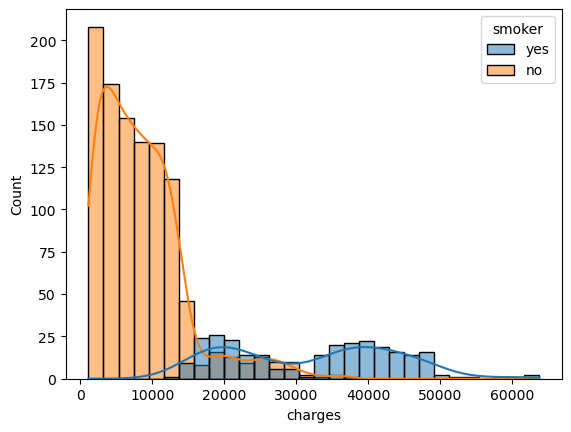

In [8]:
## Visualize the group means
sns.histplot(data=plot_df, x='charges', kde=True, hue='smoker');

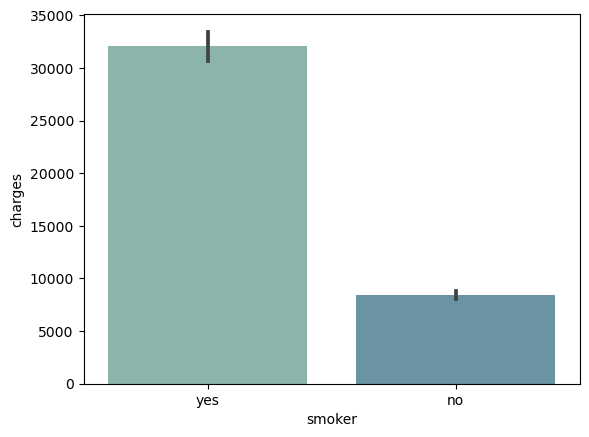

In [9]:
# Visualize the group means
sns.barplot(data=plot_df, y='charges', x='smoker', palette = "crest", alpha=.7);

<br><b><font style="font-size:23px;">Testing Assumptions</font>

- No significant outliers
- Normality
- Equal Variance

<b><font style="font-size:18px;">1. Assumption of No Sig. Outliers

In [10]:
## Saving JUST the numeric col as final group variables
smoker = smoker['charges']
non_smoker =  non_smoker['charges']
smoker

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [11]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker))>3

## How many outliers?
smoker_outliers.value_counts()

False    274
Name: charges, dtype: int64

In [12]:
## Check non_smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker))>3

## How many outliers?
non_smoker_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [13]:
## Remove Outliers from smoker
smoker = smoker[~smoker_outliers]

In [14]:
## Remove Outliers from non_smoker
non_smoker = non_smoker[~non_smoker_outliers]
non_smoker

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

<br><b><font style="font-size:19px;">2. Test for Normality

In [15]:
## Check smoker group for normality
result = stats.normaltest(smoker)
result

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [16]:
## Check n for smoker group
len(smoker)

274

In [17]:
## Check non_smoker group for normality
result = stats.normaltest(non_smoker)
result

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [18]:
## Check n for non_smoker group
len(non_smoker)

1040


- Our p-values for both groups are well below 0.05 which means our data is NOT normally distributed.  However, our sample size is large enough to proceed without satisfying this test.

<br><b><font style="font-size:18px;">3. Test for Equal Variances

In [19]:
## Use Levene's test for equal variance
result = stats.levene(smoker, non_smoker)
print(result)
result.pvalue<.05

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


True

In [20]:
# Use an if-else to help interpret the p-value
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


- We did not meet the assumption and we don't have equal variance. We just need to be careful to include "equal_var=False" when we perform our t-test.

<br><b><font style="font-size:23px;">Final Hypothesis Test</font>

- **Did we meet our test's assumptions?**
    - **If not, what is the alternative test?**
        - We did not meet the assumption.
        - We need to test with "equal_var=False" when we perform our t-test.

In [21]:
## Run Final Hypothess Test
result = stats.ttest_ind(smoker, non_smoker, equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [22]:
## Make a plot or calcualte group means to know which group had more/less.
print('Smoker:', smoker.mean(), ' Non-Smoker:', non_smoker.mean())

Smoker: 32050.23183153284  Non-Smoker: 7939.8608446721155


In [23]:
## Is our Final Result Significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0000000000
Significant: True


- **Final Conclusion:**
    - Our **p-value** is less than alpha (**p < alpha**) of **0.05** for the final test, so we **reject the null hypothesis** and support that there is a **significant difference** in the insurance charges between smokers and non-smokers, and by the mean average value of both groups, it is being derived that the **smokers have higher insurance charges** than non-smokers.
              

<BR><br><b><font style="font-size:28px;">HYPOTHESIS TESTING 2</font><br></b>
<br><b><font style="font-size:18px;">Hypothesis Test: “Are men more likely to smoke than women?“</font>
<br><br><b><font style="font-size:18px;">Hypothesis & Null Hypothesis</font>

- $H_0$ (**Null Hypothesis**): There is no difference in the likelihood to smoke amongst men and women.
- $H_1$ (**Alternate Hypothesis**): There is a significant difference in the likelihood to smoke amongst men and women.






- **The appropriate test to perform would be:**
        - Since we are measuring a likelihood, a binary target category
        - and we are comparing 2 categorical groups: 1. Men, & 2. Women
        - We therefore want to perform the Chi-Squared test.
        - Significance Level (Alpha): For this test, our alpha value is 0.05. 
    
- **According the the work flow, the 2-sample T-Test has the following assumptions:** 
    - There are two categorical variables (ordinal or nominal)
    - The outcomes are independent

<b><font style="font-size:18px;">Visualize and separate data for hypothesis</font>

- **What column is our target?**
    - Our target column is '**Smoker**'
- **What column determines our groups?**
    - Column '**Sex**' determines our groups.

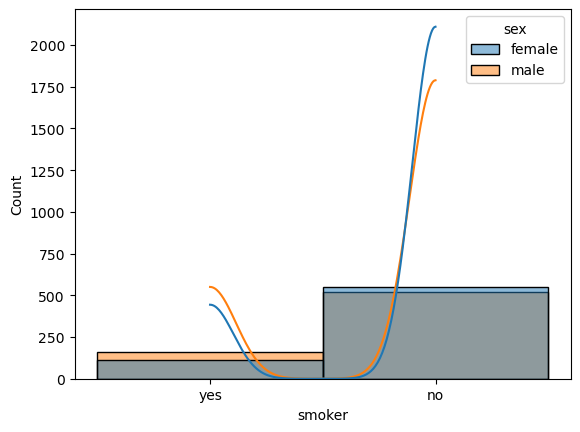

In [24]:
## Visualize the group means
sns.histplot(data=df, x='smoker', kde=True, hue='sex');

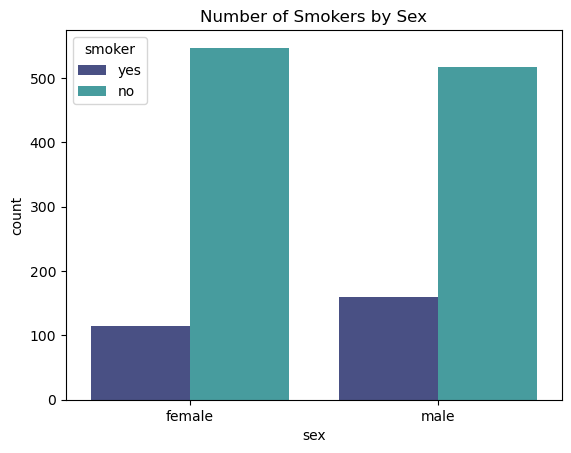

In [25]:
# Visualize the group means
ax = sns.countplot(data=df, x='sex',hue='smoker', palette='mako')
ax.set_title("Number of Smokers by Sex");

<br><b><font style="font-size:23px;">Testing Assumptions</font>

- There are two categorical variables (ordinal or nominal)

    - Smoking & Gender
    
- The outcomes are independent

In [26]:
## GETTING THE CONTINGENCY TABLE
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


<br><b><font style="font-size:23px;">Final Hypothesis Test</font>

In [27]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [28]:
## Is our Final Result Significant
print(f"p-value={p:.10f}")
print(f"Significant: {p <.05}")

p-value=0.0065481435
Significant: True


- **Final Conclusion:**
    - Since our p < .05, we reject the null hypothesis that there is no likelihood to smoke amongst men and women, and support the alternate hypothesis and conclude that there is a relationship between gender and smoking habits.
              

<BR><br><b><font style="font-size:28px;">HYPOTHESIS TESTING 3</font><br></b>
<br><b><font style="font-size:18px;">Hypothesis Test: “Do different regions have different charges, on average?“</font>
<br><br><b><font style="font-size:18px;">Hypothesis & Null Hypothesis</font>

- $H_0$ (**Null Hypothesis**): There is no difference in the charges on average, by region. The regions all have similar charge.
- $H_1$ (**Alternate Hypothesis**): There is a significant difference in the charges based on regions. Different regions charge different.






- **The appropriate test to perform would be:**
        - Since we are measuring one variable, 'charges'
        - and comparing more than two groups: 1. Southeast, 2.Southwest, 3.Northeast, 4.Northwest
        - We therefore want to perform a One-Way ANOVA Test.
        - Significance Level (Alpha): For this test, our alpha value is 0.05 by default. 
    
- **According the the work flow, the ANOVA test has the following assumptions:** 
    - No significant outliers
    - Normality
    - Equal Variance

<br><b><font style="font-size:18px;">Visualize and separate data for hypothesis</font>

- **What column is our target?**
    - Our target column is '**Charges**'
- **What column determines our groups?**
    - Column '**Region**' determines our groups.

In [29]:
## GROUP VARIABLES
#  Identifying and Separating the Groups
#  Create groups dictionary. There are 4 groups.
groups = {}
#  Loop through all unique categories
for i in df['region'].unique():
    # Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # Save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

<br><b><font style="font-size:23px;">Visualize Group Means</font>

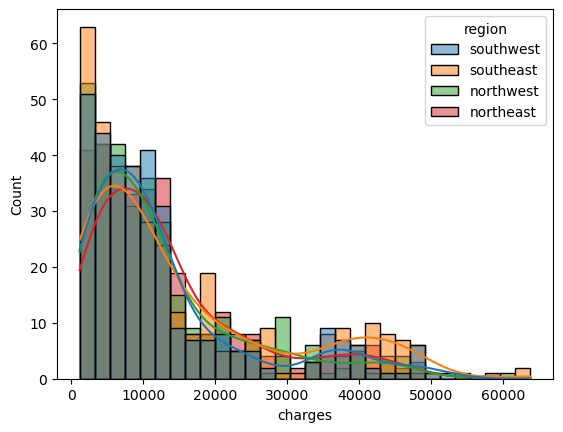

In [30]:
## Visualize the group means
sns.histplot(data=df, x='charges', kde=True, hue='region');

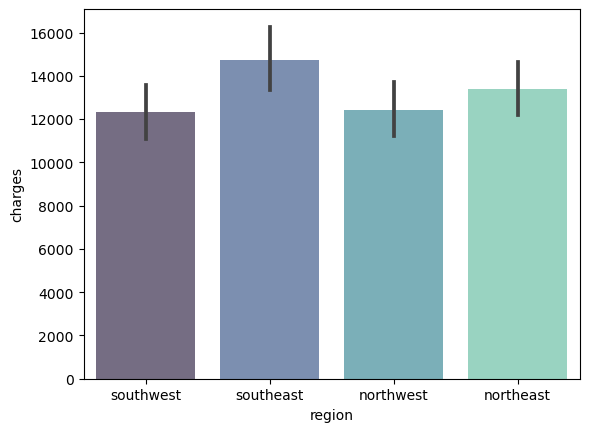

In [31]:
# Visualize the group means
sns.barplot(data=df, y='charges', x='region', palette = "mako", alpha=.7);

<br><b><font style="font-size:23px;">Testing Assumptions</font>

- No significant outliers
- Normality
- Equal Variance

<b><font style="font-size:18px;">1. Assumption of No Sig. Outliers

In [32]:
# Looping & Removing Outliers
for i in groups:
    outliers = np.abs(stats.zscore(groups[i]))>3
    print(outliers.value_counts())
    groups[i] = groups[i][~outliers]

False    317
True       8
Name: charges, dtype: int64
False    362
True       2
Name: charges, dtype: int64
False    318
True       7
Name: charges, dtype: int64
False    320
True       4
Name: charges, dtype: int64


<br><b><font style="font-size:19px;">2. Test for Normality

In [33]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [34]:
## checking significance with pandas 
norm_results_df['significance'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,significance
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True



- Our p-values for all 4 groups are well below 0.05 which means our data is NOT normally distributed.  However, our sample size is large enough to proceed without satisfying this test.

<br><b><font style="font-size:18px;">3. Test for Equal Variances

In [35]:
## Use Levene's test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [36]:
# Use an if-else to help interpret the p-value
if stats.levene(*groups.values()).pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


- We did not meet the assumption and we don't have equal variance. Given the situation we have to select a non-parametric equivalent of our test, which in this case, is the Kruskal-Wallis test.

<br><b><font style="font-size:23px;">Final Hypothesis Test</font>

- **Did we meet our test's assumptions?**
    - **If not, what is the alternative test?**
        - We did not meet the assumption.
        - We need to test the non-parametric equivalent of our ANOVA test, which is the Kruskal-Wallis test.

In [37]:
## Run Final Hypothess Test
result = stats.kruskal(*groups.values())
result

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

<font style="font-size:18px;"><b>Tukey's Pairwise Multiple Comparisons

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [39]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


In [40]:
## Is our Final Result Significant
print(f"p-value={result.pvalue:.10f}")
print(f"Significant: {result.pvalue <.05}")

p-value=0.0746884791
Significant: False


- **Final Conclusion:**
    - Our **p-value** is greater than alpha of 0.05. This indicates random chance than meaningful result. We failed to reject the null hypothesis and support the null hypothesis that there is no significant difference in the charges on average by region. The regions all have similar charges.
              